# Discrete Fourier Transform in Python

This notebook is a quick refresher on how to perform FFT in python/scipy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.fftpack import fft

We define:

- $N$: number of samples
- $f_s$: sampling frequency/rate in samples/second

In [3]:
N = 1000
f_s = 100

Period between samples:

In [4]:
T = 1/f_s

In [5]:
print(T)

0.01


Create time vector, each element corresponds to a measurement

In [6]:
t = np.linspace(0, T*N, N)

The signal which we are sampling:

\begin{align}
s(t) = 0.1 sin(2\pi 5t) + sin(2\pi 3t - 0.25\pi)
\end{align}

In [7]:
x_t = 0.1*np.sin(2*np.pi*5*t) + np.sin(2*np.pi*3*t-np.pi/4)

Text(0.5, 1.0, 'Visualizing samples')

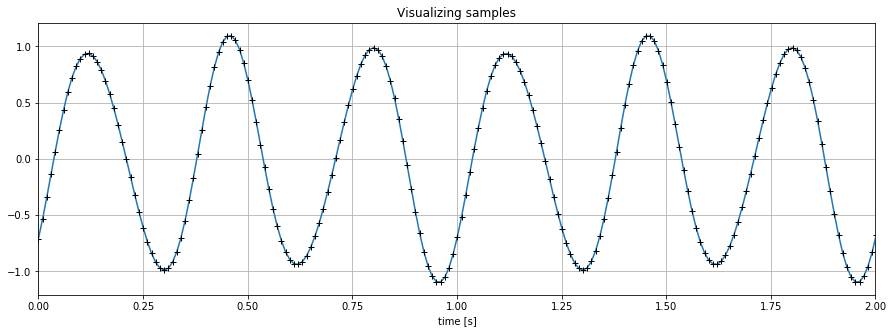

In [8]:
plt.figure(figsize=(15,5))
plt.plot(t, x_t)
plt.plot(t, x_t, "k+")
plt.xlabel("time [s]")
plt.xlim([0, 2])
plt.grid()
plt.title("Visualizing samples")

Note that we can describe the **period** of each sinus component in number of samples:

- $0.1 sin(2\pi 5t)$: **33** samples
- $sin(2\pi 3t - 0.25\pi)$ : **20** samples

Alternatively we can express the frequency in the reciprocal:

- $0.1 sin(2\pi 5t)$: **1/33 = 0.0303**
- $sin(2\pi 3t - 0.25\pi)$ : **1/20 = 0.05**

Alternatively we can express the frequency relative to the number of samples $N=1000$:

- $0.1 sin(2\pi 5t)$: **1000/33 = 30.30**
- $sin(2\pi 3t - 0.25\pi)$ : **1000/20 = 50**

## FFT

We perform the FFT on the sample array, note that the time vector ${t}$ is not used in the `fft` call:

In [9]:
a_f = fft(x_t)

In [10]:
a_f.dtype

dtype('complex128')

FFT returns a symmetric shape with positive frequencies on the right side and negative on the left:

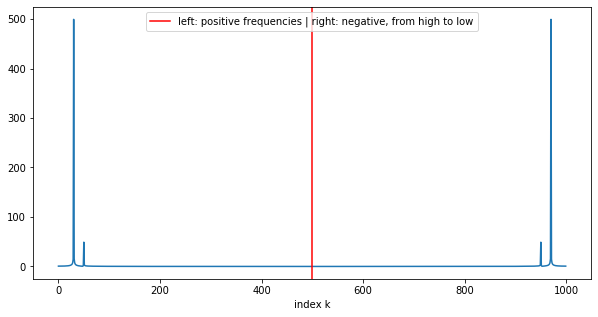

In [11]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(a_f)) # we take abs in order to get the magnitude of a complex number
plt.axvline(N//2, color="red", label="left: positive frequencies | right: negative, from high to low")
plt.xlabel("index k")
plt.legend();

Because we are interested in positive frequencies for now we cut the returned array:

In [12]:
a_f_positive = a_f[:N//2]

In [13]:
a_f_positive.shape

(500,)

Each element in `a_f` represents the real and imaginary part (amplitude $A_i$ and phase $\phi_i$) for a specific frequency $f_i$.

The "frequency" after the FFT is defined as $\frac{N}{s_i}$ in the period of specific sinus component. The period $s_i$ is expressed in number of samples.

I.e. a sinus component with a frequency of $5 Hz$ or period of $\frac{1}{5Hz} = 0.2s$ is $\frac{0.2s}{T_s} = \frac{0.2s}{0.01s} = 20$ samples long. Thus its magnitude peak should appear at $\frac{N}{s_i} = \frac{1000}{20} = 50$.

- $0.1 sin(2\pi 5t)$: low peak (because of 0.1) at $k=50$
- $sin(2\pi 3t - 0.25\pi)$: greater peak at $k= 30.303 \approx 30$

Text(0.5, 0, 'frequency in $k = N/s_i$')

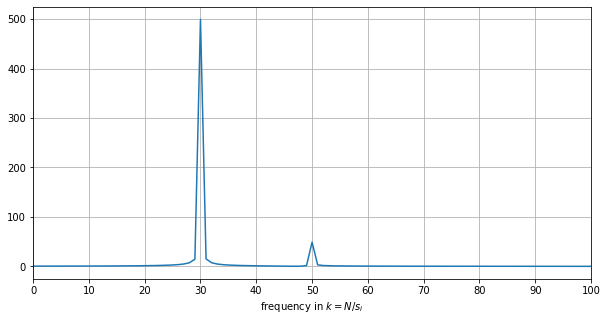

In [14]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(a_f_positive))
plt.xlim([0, 100])
plt.xticks(range(0, 101, 10))
plt.grid()
plt.xlabel("frequency in $k = N/s_i$")

In order to relate the sample-frequencies (as $N/1$) into time domain we need to convert the $k$ into frequencies as $1/s$.



\begin{align}
k = \frac{N}{s_i} = \frac{N}{T_i/T_s} = \frac{N f_i}{1/T_s} = \frac{N f_i}{f_s}
\end{align}

Our translation formula from $k$ to frequency is the following

\begin{align}
\Rightarrow f_i =& f_s\frac{k}{N}
\end{align}

In [15]:
f_i = np.arange(0, N//2)*f_s/N

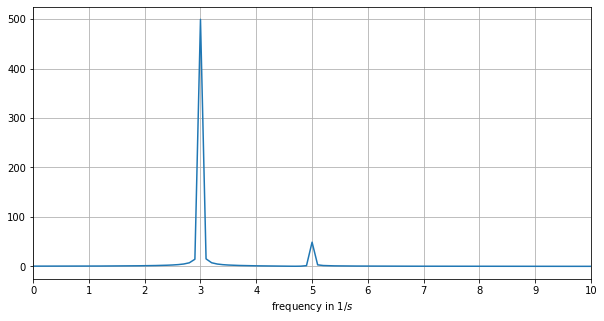

In [16]:
plt.figure(figsize=(10,5))
plt.plot(f_i, np.abs(a_f_positive))
plt.grid()
plt.xlabel("frequency in $1/s$")
plt.xticks(range(0, f_s//2, 1));
plt.xlim([0, 10]);

We need to normalize the magnitude of the peaks by the factor of $\frac{2}{N}$:

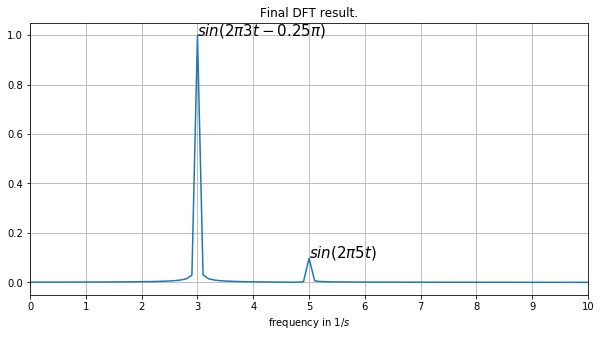

In [17]:
plt.figure(figsize=(10,5))
plt.plot(f_i, 2/N*np.abs(a_f_positive))
plt.grid()
plt.xlabel("frequency in $1/s$")
plt.xticks(range(0, f_s//2, 1));
plt.xlim([0, 10]);
plt.title("Final DFT result.")
plt.text(3, 1, "$sin(2\pi 3t - 0.25\pi)$", fontdict={"size": 15})
plt.text(5, 0.1, "$sin(2\pi 5t)$", fontdict={"size": 15});

As you can see we found both sinus components.

## Phase

We could find the magnitudes and the frequencies of both signals but not the $45°$ phase of the slower $3Hz$ signal.

In the previous section we saw that the result of the FFT algorithm is a complex array. Let's plot the real and imaginary parts relative to frequency.

(0, 10)

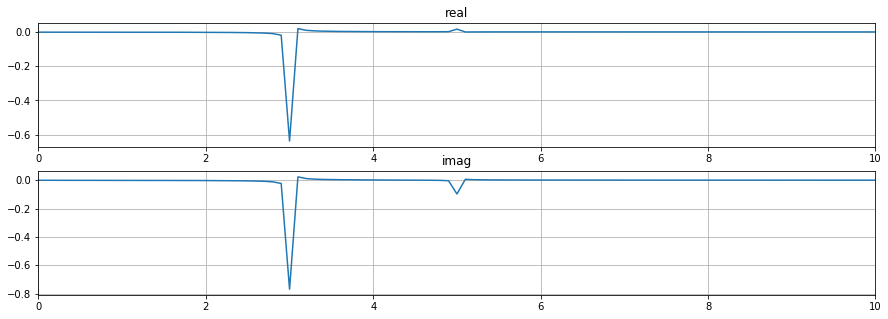

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.title("real")
plt.plot(f_i, 2/N*np.real(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(2, 1, 2)
plt.title("imag")
plt.plot(f_i, 2/N*np.imag(a_f_positive))
plt.grid()
plt.xlim([0, 10])

Lets calculate the angle of the complex number:

\begin{align}
\text{arctan} \frac{imag}{real}
\end{align}

In [19]:
angle = np.arctan(2/N*np.imag(a_f_positive),(2/N*np.real(a_f_positive)))*360/(2*np.pi)

(0, 10)

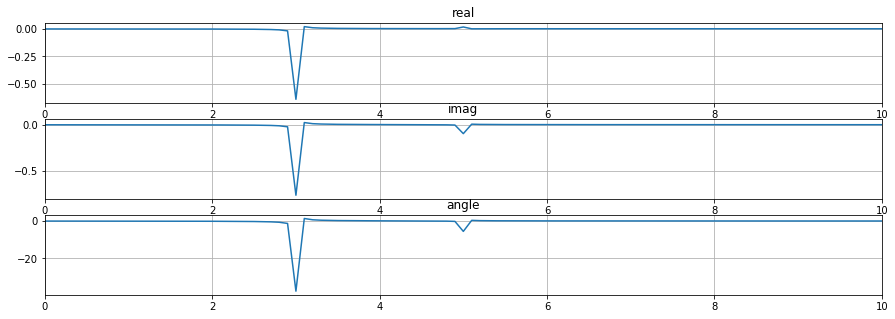

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(3, 1, 1)
plt.title("real")
plt.plot(f_i, 2/N*np.real(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 2)
plt.title("imag")
plt.plot(f_i, 2/N*np.imag(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 3)
plt.title("angle")
plt.plot(f_i, angle)
plt.grid()
plt.xlim([0, 10])

## FFT on complex numbers

Because within the multi-chirp FMCW algorithm we do a FFT on a series of complex numbers we want to make a simple example here.

Our example function of interest will be:

\begin{align}
f(t) = 0.25\text{sin}(2\pi 5 t + \phi) \\
\phi = \phi(t) = -\frac{\pi}{8}t
\end{align}

The phase shift is time dependent in this example.

In [21]:
def f(t, phi=0):
    return 0.25*np.sin(2*np.pi*5*t + phi)

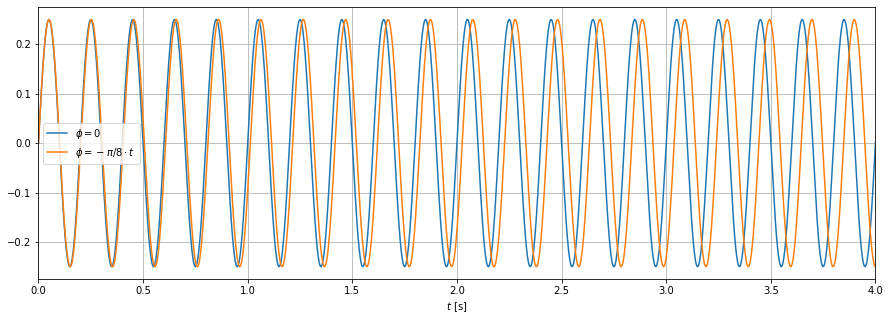

In [22]:
t = np.linspace(0, 10, 10000)
plt.figure(figsize=(15,5))
plt.plot(t, f(t), label="$\phi=0$")
plt.plot(t, f(t, -np.pi/8*t), label="$\phi=-\pi/8 \cdot t$")
plt.xlim([0, 4])
plt.xlabel("$t$ [s]")
plt.grid()
plt.legend();

For the sake of our example we will run the FFT each $T_{cycle}$

In [23]:
T_cycle = 2 # seconds
n_cycles = 200
f_cycle = 1/T_cycle

Per cycle FFT config

In [24]:
f_s = 100
T_s = 1/f_s
N = int(T_cycle/T_s)

In [25]:
print(N)

200


We run FFT in each cycle and save the results in a list.

In [26]:
fft_cycle_results = list()

In [27]:
for c in range(n_cycles):
    t_start = c*T_cycle
    t_end = (c+1)*T_cycle
    t_sample = np.arange(t_start, t_end, T_s)
    f_sample = f(t_sample, -np.pi/8*t_sample)
    fft_res = fft(f_sample)
    fft_cycle_results.append(fft_res)

We cut the positive frequency range and normalize the amplitudes.

In [28]:
fft_cycle_results = [2/N*r[:N//2] for r in fft_cycle_results]

In [29]:
freq = np.arange(0, N//2)*f_s/N

In [30]:
freq

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5])

**Note**: The FFT frequency resolution is at 1Hz. That's important because the frequency shift by $-\frac{1}{8}Hz$ introduced by $\phi(t)$ is not visible in the FFT!

The FFT will show a peak at 5Hz with a different phase each time.

Because the frequency is almost the same in each cycle, we expect the same behaviour in each result:

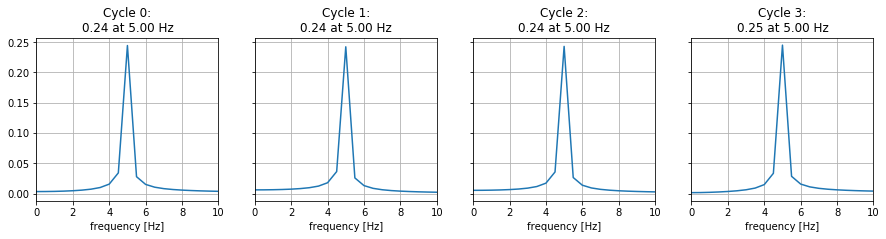

In [31]:
n_cycles_to_display = 4
fft_res_display = fft_cycle_results[:n_cycles_to_display]

fig, ax = plt.subplots(ncols=len(fft_res_display), figsize=(15, 3), sharex=True, sharey=True)
for i, ax, res in zip(range(n_cycles_to_display), ax, fft_res_display):
    res_abs = np.abs(res)
    ax.plot(freq, res_abs)
    ax.grid(True)
    ax.set_xlim([0, 10])
    ax.set_xlabel("frequency [Hz]")
    
    k = np.argmax(res_abs)
    magn_max = res_abs[k]
    freq_max = freq[k]
    
    ax.set_title("Cycle %d:\n%.2f at %.2f Hz" % (i, magn_max, freq_max))

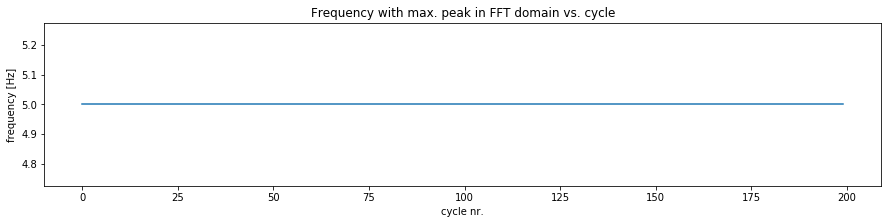

In [32]:
freq_list = list()
for res in fft_cycle_results:
    res_abs = np.abs(res)
    k = np.argmax(res_abs)
    freq_list.append(freq[k])
    
plt.figure(figsize=(15,3))
plt.plot(freq_list)
plt.xlabel("cycle nr.")
plt.ylabel("frequency [Hz]")
plt.title("Frequency with max. peak in FFT domain vs. cycle");

It seems that the position (frequency) of the peaks remains the same, the magnitude changes.

Let's collect the max. frequency component from each cycle

In [33]:
cycle_max_list = list()

for res in fft_cycle_results:
    res_abs = np.abs(res)
    k = np.argmax(res_abs)
    cycle_max_list.append(res[k])

... and visualize the complex numbers:

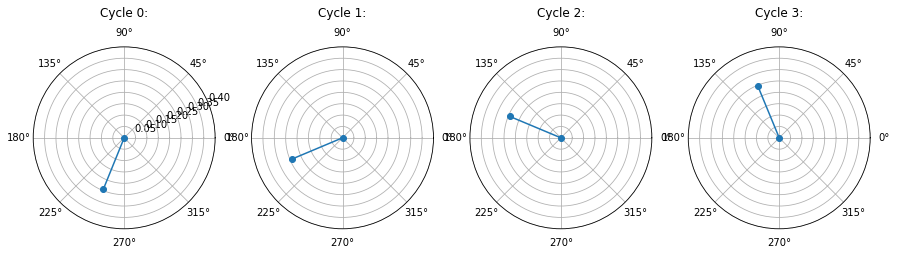

In [34]:
n_cycles_to_display = 4
cycle_max_list_display = cycle_max_list[:n_cycles_to_display]

fig, ax = plt.subplots(ncols=len(cycle_max_list_display), figsize=(15, 30), subplot_kw={'projection': "polar"}, sharey=True)

for i, ax, res in zip(range(n_cycles_to_display), ax, cycle_max_list_display):
    #ax.scatter(np.angle(res), np.abs(res))
    #ax.arrow(0, 0, np.angle(res), np.abs(res), length_includes_head=True, width=0.01)
    ax.plot([0, np.angle(res)], [0, np.abs(res)], marker="o")
    
    #print(np.angle(res))
    #angle_vector = np.linspace(0, np.angle(res)//(2*np.pi), 1000)
    #ax.plot(angle_vector, np.abs(res)*np.ones_like(angle_vector))
    ax.set_ylim([0, 0.4])
    ax.set_title("Cycle %d:\n" % (i, ))

We can see that the angle moves in negative direction with -45° per cycle.

### Solution via phase differences

Now we could calculate ange velocity by taking differences between cycles and put them relative to cycle duration:

In [35]:
angle_diff = np.diff(np.angle(cycle_max_list, deg=True))
angle_vel = angle_diff/T_cycle
print(angle_vel[:10])

[-22.57811002 157.25241595 -22.41998496 -22.25432097 -22.57811002
 -22.74758405 -22.41998496 -22.25432097 -22.57811002 157.25241595]


In [36]:
157.25241595-180

-22.74758405

In [37]:
angle_vel[angle_vel>0] -= 180

In [38]:
angle_vel[:10]

array([-22.57811002, -22.74758405, -22.41998496, -22.25432097,
       -22.57811002, -22.74758405, -22.41998496, -22.25432097,
       -22.57811002, -22.74758405])

(-100, 0)

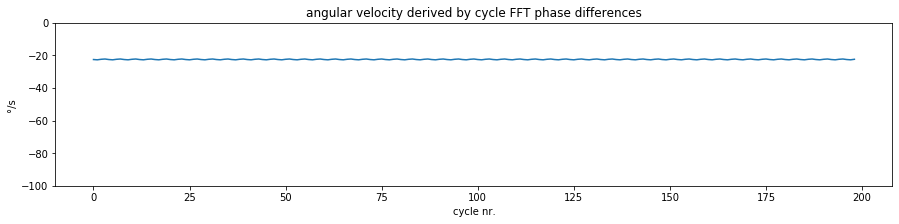

In [39]:
plt.figure(figsize=(15,3))
plt.plot(angle_vel)
plt.xlabel("cycle nr.")
plt.ylabel("°/s")
plt.title("angular velocity derived by cycle FFT phase differences")
plt.ylim([-100, 0])

As you can see the phases of the FFT results in each cycle give a hint over the phase velocity of the signal in time domain.

### Solution via second FFT

We can find the phase velocity via a second FFT over the cycle results, too.

Remember, those are our results (FFT-magnitude from the 5Hz-component):

In [40]:
cycle_max_list[:5]

[(-0.0917796215264235-0.22644808906297761j),
 (-0.22334337399156695-0.09379786966319806j),
 (-0.22407560703847842+0.09379786966349972j),
 (-0.09354738847923255+0.22644808906302294j),
 (0.09177962152656509+0.22644808906289618j)]

In [41]:
second_fft_res = fft(cycle_max_list)[:n_cycles//2]

In [42]:
second_fft_res[:5]

array([ 2.59792188e-13-3.47041840e-13j,  5.82707493e-12-1.78618093e-11j,
       -1.55814079e-11-1.21248179e-11j, -7.42825218e-13+9.69863083e-12j,
        1.79380696e-11-1.00087939e-11j])

In [43]:
freq_second = np.arange(0, n_cycles//2)*f_cycle/n_cycles
omega_second = 360*freq_second

In [44]:
omega_second

array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
        9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. , 18.9,
       19.8, 20.7, 21.6, 22.5, 23.4, 24.3, 25.2, 26.1, 27. , 27.9, 28.8,
       29.7, 30.6, 31.5, 32.4, 33.3, 34.2, 35.1, 36. , 36.9, 37.8, 38.7,
       39.6, 40.5, 41.4, 42.3, 43.2, 44.1, 45. , 45.9, 46.8, 47.7, 48.6,
       49.5, 50.4, 51.3, 52.2, 53.1, 54. , 54.9, 55.8, 56.7, 57.6, 58.5,
       59.4, 60.3, 61.2, 62.1, 63. , 63.9, 64.8, 65.7, 66.6, 67.5, 68.4,
       69.3, 70.2, 71.1, 72. , 72.9, 73.8, 74.7, 75.6, 76.5, 77.4, 78.3,
       79.2, 80.1, 81. , 81.9, 82.8, 83.7, 84.6, 85.5, 86.4, 87.3, 88.2,
       89.1])

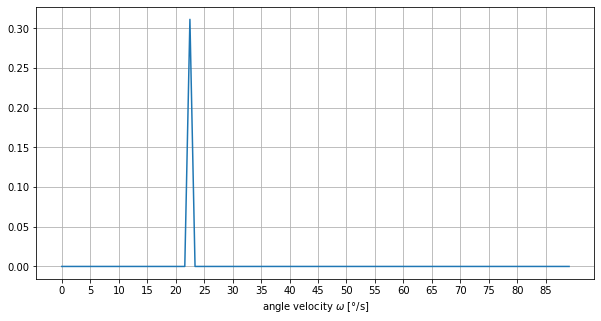

In [45]:
plt.figure(figsize=(10,5))
plt.plot(omega_second, np.abs(second_fft_res))
plt.grid()
plt.xlabel("angle velocity $\omega$ [°/s]")
plt.xticks(range(0, 90, 5));

As you could see we could detect the phase change with a second FFT on the results of the first FFT.